In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def mean_dis_of_risinig(arr):
  sum = 0.0
  lst_seen = 0
  for idx in range(1,len(arr)):
    if arr[idx]>arr[idx-1]:
      sum += idx - lst_seen
      lst_seen = idx
  return sum/len(arr)

def time_stability(arr):
  sum = 0.0
  up_down = 1
  for idx in range(1,len(arr)):
    if up_down * arr[idx] > up_down * arr[idx-1]:
      sum += 1
      up_down *= -1
    up_down *= -1
  return sum/len(arr)

def mean_squared(arr):
  return np.mean(np.square(arr))

In [ ]:
from skimage.transform import resize
import random

(initial_x_train,y_train),(initial_x_test,y_test) = mnist.load_data()

y_train = y_train[:10000]

x_train = []
for init_x in (initial_x_train[:10000])/255.0:
  rnd_height, rnd_width = random.randint(15, 34),random.randint(15, 34)  
  init_x = resize(init_x, (rnd_height, rnd_width),
                       anti_aliasing=True)
  init_x_t = init_x.T
  x = []
  for idx,row in enumerate(init_x):
    x.append([np.mean(row),mean_dis_of_risinig(row),time_stability(row),mean_squared(row),np.square(np.mean(row))])
  x.append([0,-1,0,-1,0])
  x.append([-1,0,-1,0,-1])
  for idx,col in enumerate(init_x_t):
    x.append([np.mean(col),mean_dis_of_risinig(col),time_stability(col),mean_squared(col),np.square(np.mean(col))])
  if np.array(x).shape[-1] != 5:
    print(np.array(x).shape[-1])
  x_train.append(np.array(x))

init_xs_tests = []
x_test = []
for init_x in (initial_x_test)/255.0:
  init_x_t = init_x.T
  rnd_height, rnd_width = random.randint(15, 34),random.randint(15, 34)
  init_x_test = resize(init_x, (rnd_height, rnd_width),
                       anti_aliasing=True)
  init_xs_tests.append(init_x_test)
  x = []
  for idx,row in enumerate(init_x):
    x.append([np.mean(row),mean_dis_of_risinig(row),time_stability(row),mean_squared(row),np.square(np.mean(row))])
  x.append([0,-1,0,-1,0])
  x.append([-1,0,-1,0,-1])
  for idx,col in enumerate(init_x_t):
    x.append([np.mean(col),mean_dis_of_risinig(col),time_stability(col),mean_squared(col),np.square(np.mean(col))])
  x_test.append(np.array(x))

init_xs_tests = np.array(init_xs_tests)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
x_test = []
for init_x in (initial_x_test)/255.0:
  init_x_t = init_x.T
  x = []
  for idx,row in enumerate(init_x):
    x.append([np.mean(row),mean_dis_of_risinig(row),time_stability(row),mean_squared(row),np.square(np.mean(row))])
  x.append([0,-1,0,-1,0])
  x.append([-1,0,-1,0,-1])
  for idx,col in enumerate(init_x_t):
    x.append([np.mean(col),mean_dis_of_risinig(col),time_stability(col),mean_squared(col),np.square(np.mean(col))])
  x_test.append(np.array(x))

In [ ]:
x_train = np.array(x_train)
x_test1 = np.array(x_test)

print(x_train1.shape)
print(x_test1.shape)

(10000,)
(10000, 56, 5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
model = keras.Sequential(name="lstm_mean_recognizer")
model.add(keras.Input(shape=[None,5]))
model.add(keras.layers.Dense(15,activation='sigmoid'))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(40,return_sequences=True)))
model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Bidirectional(keras.layers.GRU(20,return_sequences=False,activation=None)))
model.add(layers.LeakyReLU())
model.add(keras.layers.Dense(10))

print(model.summary())

Model: "lstm_mean_recognizer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, None, 15)          90        
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 80)          17920     
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 80)          0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 40)                12240     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 40)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                410       
Total params: 30,660
Trainable params: 30,660
Non-trainable params: 0
__________________________________________

(38, 5)


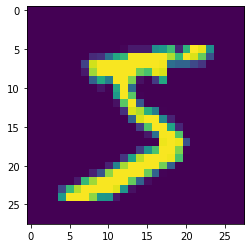

In [ ]:
print(x_train[1].shape)
plt.imshow(initial_x_train[0])
plt.show()

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=keras.optimizers.Adam(learning_rate=0.003),metrics=["accuracy"])

In [ ]:
print(x_train.shape)
x_train_padded = keras.preprocessing.sequence.pad_sequences(x_train,maxlen=64,padding="post",truncating="post",value=-1.0,dtype = 'float32')

print(x_train_padded[0].shape)
print(x_train[0].shape)

model.fit(x=x_train_padded,y=y_train,batch_size = 32,verbose=2,epochs=10)

(10000,)
(64, 5)
(57, 5)
Epoch 1/10
313/313 - 24s - loss: 0.6916 - accuracy: 0.7644
Epoch 2/10
313/313 - 24s - loss: 0.5624 - accuracy: 0.8103
Epoch 3/10
313/313 - 24s - loss: 0.4956 - accuracy: 0.8329
Epoch 4/10
313/313 - 24s - loss: 0.4458 - accuracy: 0.8500
Epoch 5/10
313/313 - 24s - loss: 0.4186 - accuracy: 0.8622
Epoch 6/10
313/313 - 24s - loss: 0.3948 - accuracy: 0.8676
Epoch 7/10
313/313 - 24s - loss: 0.3632 - accuracy: 0.8774
Epoch 8/10
313/313 - 24s - loss: 0.3477 - accuracy: 0.8839
Epoch 9/10
313/313 - 24s - loss: 0.3338 - accuracy: 0.8875
Epoch 10/10
313/313 - 24s - loss: 0.3019 - accuracy: 0.9022


In [ ]:
model.fit(x=x_train_padded,y=y_train,batch_size = 100,verbose=2,epochs=5)

In [ ]:
model.evaluate(x=np.array(x_test),y=y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.3447 - accuracy: 0.8911


[0.3446541130542755, 0.8910999894142151]

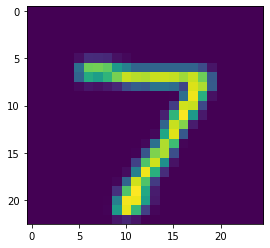

7


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


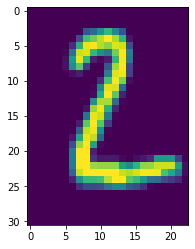

2


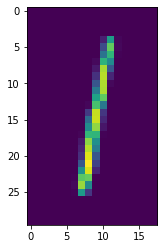

1


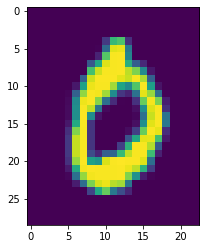

0


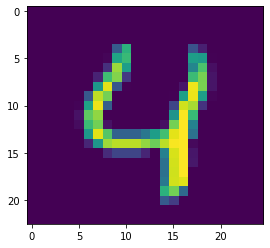

4


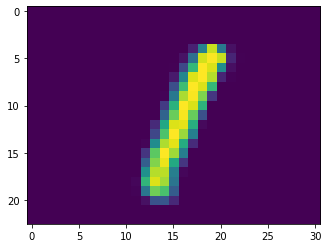

1


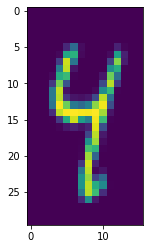

4


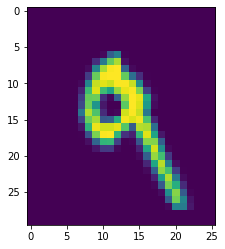

9


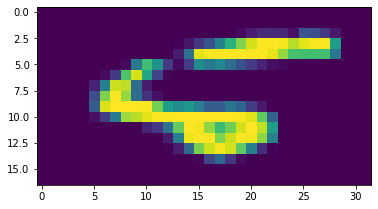

5


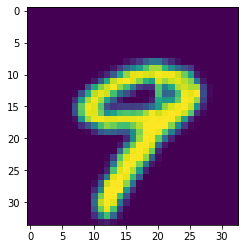

7


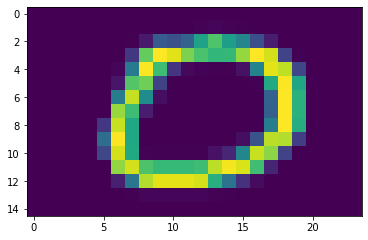

0


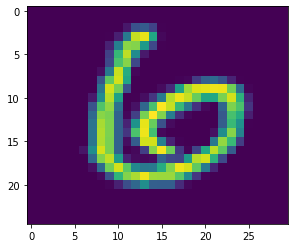

6


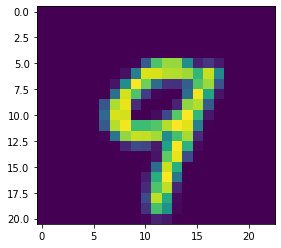

9


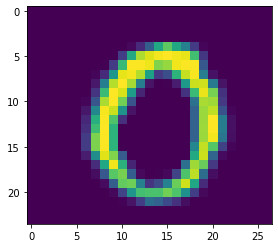

0


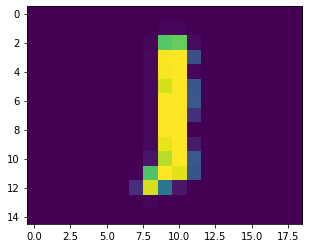

1


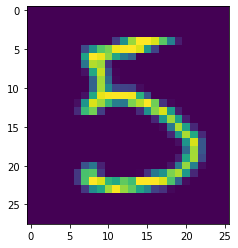

5


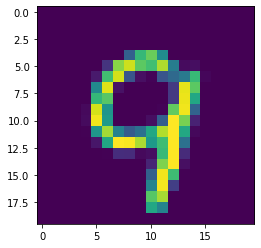

9


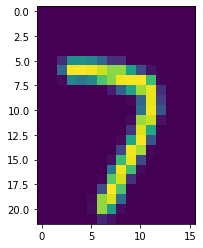

7


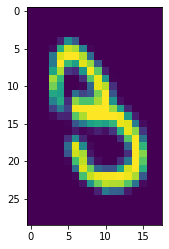

3


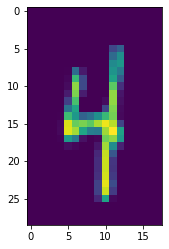

4


In [ ]:
for idx,x in enumerate(init_xs_tests[:20]):
  plt.imshow(x)
  plt.show()
  print(model.predict_classes(np.array(x_test)[:20])[idx])